Simple task: Record audio

In [20]:
# Source : https://www.thepythoncode.com/article/play-and-record-audio-sound-in-python

import pyaudio
import wave

# the file name output you want to record into
filename = "recorded.wav"
# set the chunk size of 1024 samples
chunk = 1024
# sample format
FORMAT = pyaudio.paInt16
# mono, change to 2 if you want stereo
channels = 1
# 44100 samples per second
sample_rate = 20000
record_seconds = 5



In [21]:


# initialize PyAudio object
p = pyaudio.PyAudio()
# open stream object as input & output
stream = p.open(format=FORMAT,
                channels=channels,
                rate=sample_rate,
                input=True,
                output=True,
                frames_per_buffer=chunk)
frames = []
print("Recording...")
for i in range(int(sample_rate / chunk * record_seconds)):
    data = stream.read(chunk)
    # if you want to hear your voice while recording
    # stream.write(data)
    frames.append(data)
print("Finished recording.")
# stop and close stream
stream.stop_stream()
stream.close()
# terminate pyaudio object
p.terminate()
# save audio file
# open the file in 'write bytes' mode
wf = wave.open(filename, "wb")
# set the channels
wf.setnchannels(channels)
# set the sample format
wf.setsampwidth(p.get_sample_size(FORMAT))
# set the sample rate
wf.setframerate(sample_rate)
# write the frames as bytes
wf.writeframes(b"".join(frames))
# close the file
wf.close()

Recording...
Finished recording.


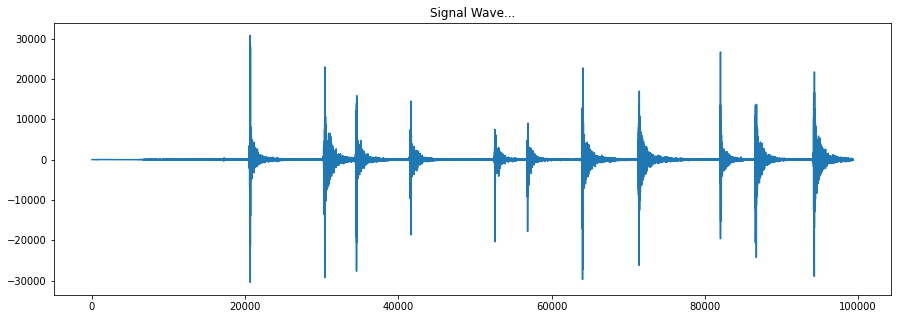

In [22]:
# Open wav file and load into numpy array
import numpy as np
import wave
import matplotlib.pyplot as plt

# Open wav file and load into numpy array
wav_file = wave.open("recorded.wav", "r")
signal = wav_file.readframes(-1)
signal = np.frombuffer(signal, dtype="int16")
fs = wav_file.getframerate()
wav_file.close()

# Plot the signal read from wav file
plt.figure(1, figsize=(15, 5))
plt.title("Signal Wave...")
plt.plot(signal)
plt.show()


In [ ]:
# Make a autoencoder model to compress the audio signal
from tensorflow.keras.layers import Input, Dense

# Input layer
input_layer = Input(shape=(signal.shape[0],))
# Encoder layers
encoded = Dense(256, activation="relu")(input_layer)
encoded = Dense(128, activation="relu")(encoded)
encoded = Dense(64, activation="relu")(encoded)
# Latent view
latent_view = Dense(32, activation="relu")(encoded)
# Decoder layers
decoded = Dense(64, activation="relu")(latent_view)
decoded = Dense(128, activation="relu")(decoded)
decoded = Dense(256, activation="relu")(decoded)
# Output layer
output_layer = Dense(signal.shape[0], activation="linear")(decoded)

# Compile the model
from tensorflow.keras.models import Model

autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer="adam", loss="mse")
autoencoder.summary()

# Train the model
